<img src="https://i.pngimg.me/thumb/f/720/comvecteezy492057.jpg" style="float: left; margin: 20px; height: 85px">

# Classification Project
## Relationship Status Group Prediction

--- 
# Part 2 - Exploratory Data Analysis

---

- <span style="font-size: 16px;"> Most common words for each group, with and without stop words 
- <span style="font-size: 16px;"> Explore groups' specific words
- <span style="font-size: 16px;"> Explore special characters, text length
- <span style="font-size: 16px;"> Explore groups' sentiment analysis

# Packages Import

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#import warnings
#warnings.filterwarnings('ignore')

# Reading Data

In [12]:
# reading the dataset of dating and marriage subreddits - generated in 'scraping'
date_marry = pd.read_csv('../output/marriage_dating.csv')
date_marry.drop(columns = 'Unnamed: 0', inplace = True)

In [13]:
date_marry.head()

,title,self_text,subreddit
0,What does it mean when a girl says I don’t fee...,I had a date yesterday and I thought it was ok...,dating
1,why do some guys get hurt/bothered if you slee...,My ex recently found out I hooked up with some...,dating
2,Worst era to ever date in as a guy.,Is there a single (attractive) young woman (ea...,dating
3,"Why do some men hate ""Vanilla women""?","Hiya. Earlier today I got called a ""vanilla wo...",dating
4,Guys the Victim mentality WONT help you,I've been couple of years in this sub and that...,dating


In [14]:
date_marry.isna().sum()

title        0
self_text    0
subreddit    0
dtype: int64

In [15]:
# binarizing target variable: subreddit
# 'dating' is 1, 'marriage' is 0
date_marry['subreddit'] = (date_marry['subreddit']=='dating')*1

In [16]:
date_marry.head()

,title,self_text,subreddit
0,What does it mean when a girl says I don’t fee...,I had a date yesterday and I thought it was ok...,1
1,why do some guys get hurt/bothered if you slee...,My ex recently found out I hooked up with some...,1
2,Worst era to ever date in as a guy.,Is there a single (attractive) young woman (ea...,1
3,"Why do some men hate ""Vanilla women""?","Hiya. Earlier today I got called a ""vanilla wo...",1
4,Guys the Victim mentality WONT help you,I've been couple of years in this sub and that...,1


In [17]:
# Checking the size of the dataset
date_marry.shape

(8336, 3)

In [18]:
# Checking if there are duplicates
date_marry.drop_duplicates(inplace=True)
date_marry.shape

(8336, 3)

In [19]:
# Checking the baseline of the dataset
date_marry['subreddit'].value_counts(normalize=True)

1    0.609405
0    0.390595
Name: subreddit, dtype: float64

# Exploratory Data Analysis

## Most common words, with stop words

In [20]:
# Redefine training and testing sets.
X = date_marry[date_marry['subreddit']==0]['self_text']
y = date_marry['subreddit']
cvec = CountVectorizer()

In [21]:
X = cvec.fit_transform(X)

Text(0.5, 1.0, 'Marriage most common words')

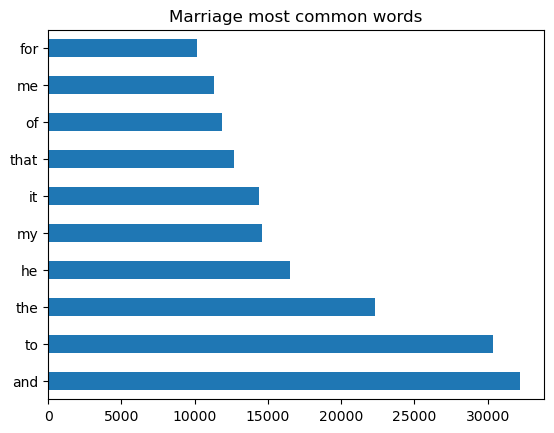

In [22]:
X_df = pd.DataFrame(X.todense(), columns = cvec.get_feature_names_out())
X_df.sum().sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Marriage most common words')

In [23]:
# Redefine training and testing sets.
X = date_marry[date_marry['subreddit']==1]['self_text']
y = date_marry['subreddit']
cvec = CountVectorizer()

In [24]:
X = cvec.fit_transform(X)

Text(0.5, 1.0, 'Dating most common words')

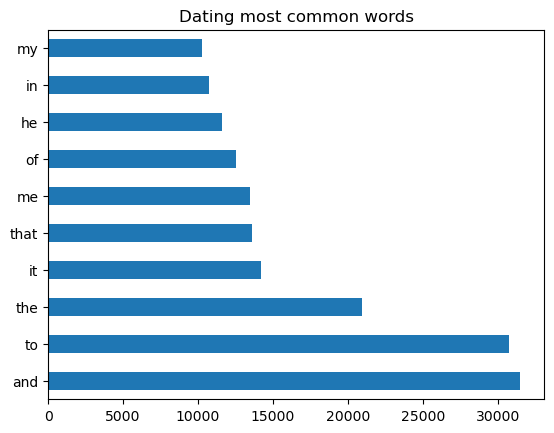

In [25]:
X_df = pd.DataFrame(X.todense(), columns = cvec.get_feature_names_out())
X_df.sum().sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Dating most common words')

<span style="font-size: 17px;">Plotting the 10 most common words considering the stop words dont tell us much about the words too specific to each of the subreddits, since without context these words do not mean much. This does not tell us about the main concerns of each group. Maybe without the stop words we can see something...

## Most common words, without stop words

In [26]:
# Redefine training and testing sets.
X = date_marry[date_marry['subreddit']==0]['self_text']
y = date_marry['subreddit']
cvec = CountVectorizer(stop_words='english')

In [27]:
X = cvec.fit_transform(X)

Text(0.5, 1.0, 'Marriage most common words')

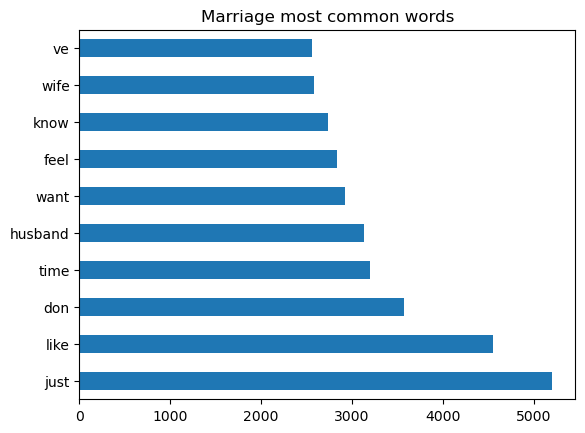

In [28]:
X_df = pd.DataFrame(X.todense(), columns = cvec.get_feature_names_out())
X_df.sum().sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Marriage most common words')

In [29]:
# Redefine training and testing sets.
X = date_marry[date_marry['subreddit']==1]['self_text']
y = date_marry['subreddit']
cvec = CountVectorizer(stop_words='english')

In [30]:
X = cvec.fit_transform(X)

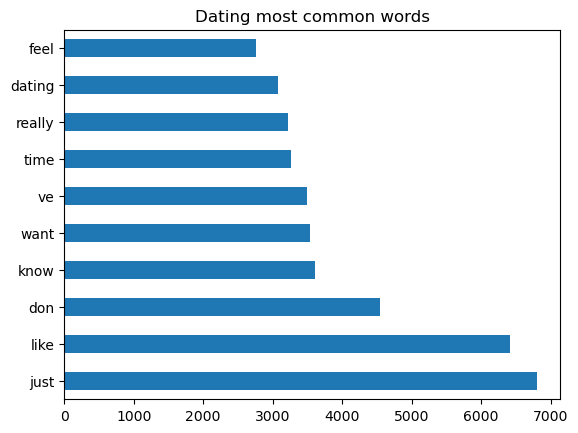

In [31]:
X_df = pd.DataFrame(X.todense(), columns = cvec.get_feature_names_out())
X_df.sum().sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Dating most common words');

<span style="font-size: 17px;"> There are 6 words in common of the 10 most common words of each group: just, like, dont/don, time, want, know. This certainly does not help with undestanding the difference of the main concerns of each group. The most common words using only CountVectorizer do not tell us much about the issues or situations underlying each group the person is in. After modelling using a linear classifier, it will be possible to check the features with highest coefficient for both groups, maybe this might give an idea of the actual content of these discussions.

<span style="font-size: 16px;">Let us check if there are any text with just stop words, which would not help the goal to find main concerns of each group:

In [32]:
num_rows_with_zeros = (X.toarray() == 0).all(axis=1).sum()
num_rows_with_zeros

0

<span style="font-size: 16px;">When not considering stop words, two marriage keywords that were explored earlier in the barplots are actually in the top 10 most common words in marriage's posts' texts <br>

<span style="font-size: 16px;">In CountVectorizer, there are parameters to filter the frequency of appearance of words. Setting a value for max_df will filter out words that appear in the documents more than this set threshold, and min_df will filter out words that appear in less than the value set for this threshold. It is worth seeing if there are texts that, after these "filters" in count vectorizer will have only zeros as values in the sparse matrix.

In [33]:
cvec = CountVectorizer(max_df=0.80, min_df=10)
X = date_marry['self_text']
X = cvec.fit_transform(X)

In [34]:
X_df = pd.DataFrame(X.todense(), columns = cvec.get_feature_names_out())
X_df.head()

,00,000,10,100,1000,100k,10pm,11,11pm,12,...,youngest,your,yours,yourself,youtube,yr,yrs,zero,zone,zoned
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0


In [35]:
X_df.isna().sum().sum()

0

In [36]:
num_rows_with_zeros = (X_df.values == 0).all(axis=1).sum()
num_rows_with_zeros

3

In [37]:
indices_with_zeros = X_df.index[(X_df.values == 0).all(axis=1)]
indices_with_zeros

Int64Index([4839, 5132, 7821], dtype='int64')

In [38]:
date_marry.iloc[indices_with_zeros]['self_text']

4839        .
5132    Utrfh
7821      Lmk
Name: self_text, dtype: object

<span style="font-size: 16px;"> This seems odd... maybe the title already says everything...

In [39]:
date_marry['text_length'] = date_marry['self_text'].apply(lambda x: len(x))
date_marry[date_marry['text_length']<10]

,title,self_text,subreddit,text_length
4529,Why marry if over half end in divorce,Title,0,5
4839,Miss sleeping with other women,.,0,1
5132,I wanted space from my husband and he found me?,Utrfh,0,5
5594,Sex Raincheck & Husband's Reaction,&#x200B;,0,8
6037,How to get over MIL trauma?,Edit,0,4
6671,If you are bored with someone does that mean t...,Thoughts?,0,9
7821,Is living before marriage necessary in your op...,Lmk,0,3


<span style="font-size: 16px;"> The smallest "self_text" is due to the fact that the title already contains the whole post... So, let's consider title and self text for extracting the whole meaning of the posts...

In [40]:
date_marry['all_text'] = date_marry['title'] + ' ' + date_marry['self_text']

In [41]:
date_marry['text_length'] = date_marry['all_text'].apply(lambda x: len(x))
date_marry[date_marry['text_length']<10]

,title,self_text,subreddit,text_length,all_text


 # Analyzing some specific words
<span style="font-size: 16px;">Let's explore some words that can be very specific to each one of the subreddits

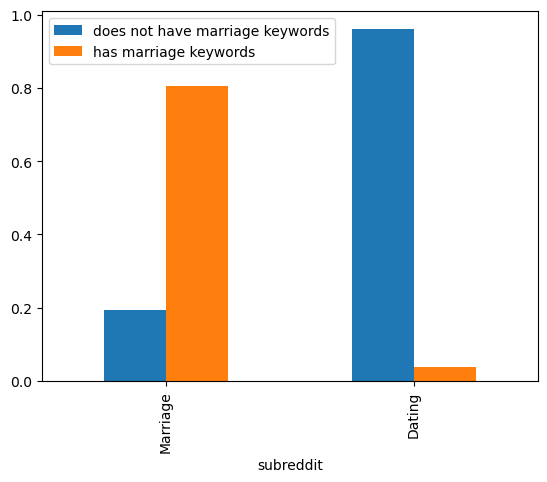

In [42]:
marriage_keywords = ['husband','wife','wedding','marry'] 
date_marry['marriage_keywords'] = date_marry['all_text'].apply(lambda x: 1\
                                                            if any(word in x.lower() for word in marriage_keywords)\
                                                            else 0)
date_marry.groupby('subreddit')['marriage_keywords'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar')
plt.xticks([0, 1], ['Marriage', 'Dating'])
plt.legend(['does not have marriage keywords', 'has marriage keywords']);

<span style="font-size: 16px;">From the graph above, it is possible to see that aproximately 40% of marriage subreddits have "husband", "wife", "wedding" or "marry" in the title, while almost 100% of the dating's subreddit titles do not mention these words. This could facilitate a lot the model to predict from which subreddit the post is from...

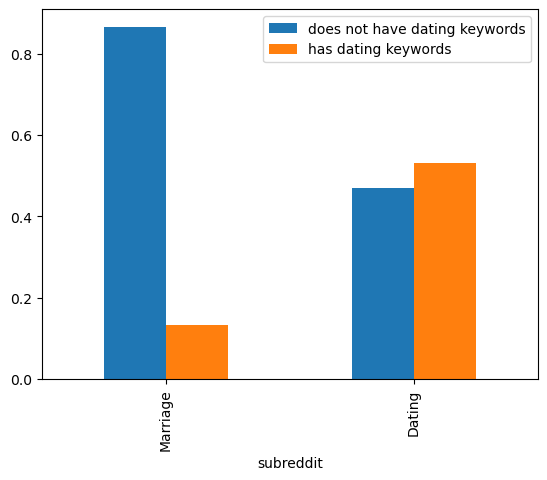

In [43]:
dating_keywords = ['boyfriend','girlfriend','gf','bf', 'dating'] 
date_marry['dating_keywords'] = date_marry['all_text'].apply(lambda x: 1\
                                                            if any(word in x.lower() for word in dating_keywords)\
                                                            else 0)
date_marry.groupby('subreddit')['dating_keywords'].value_counts(normalize=True).unstack(level = 1).plot(kind = 'bar')
plt.xticks([0, 1], ['Marriage', 'Dating'])
plt.legend(['does not have dating keywords', 'has dating keywords']);

<span style="font-size: 16px;">Boyfriend, girlfriend and dating do not seem to be so specific as marriage keywords are... <br>
Beyond the obvious, what are the types of problems or questions they have with their respective person of interest?

# Special characters - are there differences between subreddits?

### Counting special characters and checking if there are differences between subreddits

code from cell below adapted from [this link in stack overflow](https://stackoverflow.com/questions/59687650/how-to-count-special-chars-in-column-in-pandas)

In [44]:
date_marry["special_characters"] = date_marry["all_text"].apply(lambda x: sum(not c.isalpha() for c in x ))
date_marry["special_characters"]

0        168
1         70
2         64
3        151
4        246
        ... 
8331     121
8332    1020
8333      16
8334     530
8335     124
Name: special_characters, Length: 8336, dtype: int64

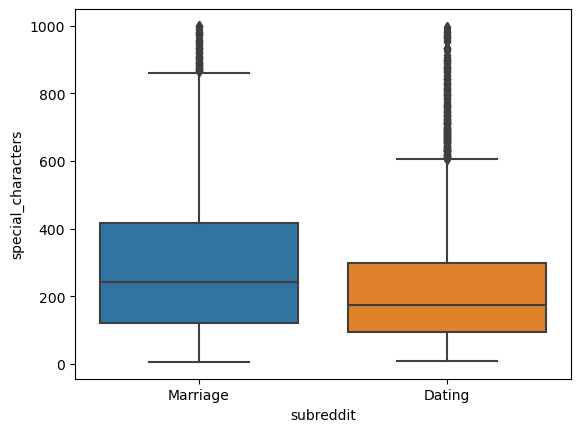

In [45]:
# special characters boxplot for each group without outliers
sns.boxplot(x="subreddit", y="special_characters",data=date_marry[date_marry['special_characters']<1000])
plt.xticks([0, 1], ['Marriage', 'Dating']);

In [46]:
date_marry.groupby('subreddit')['special_characters'].describe()

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
0,3256.0,353.378071,374.403029,6.0,126.0,256.0,458.25,5580.0
1,5080.0,242.507874,239.008372,10.0,96.0,175.0,306.25,4310.0


In [47]:
# looking at the post with the highest number of special characters
max_special_characters = date_marry['special_characters'].max()
print(max_special_characters)
most_special_characters = date_marry[date_marry["special_characters"]==max_special_characters]['all_text']
for string in most_special_characters:
    print(string)

5580
Might be divorcing. I'm alone, not doing well. Not sure what to do. Please help. Hello everyone.  Not sure how to start as it is a long story. English is not my native language and I'm typing this from my phone, I apologize for any grammar mistakes.

I (m36) and wife (f30) have been married for almost 10 years now.
We've met via Facebook, she used to live 1000km away from me, we had a long distance relationship and found a way to make it work for 6 months, then we met physically, confirmed it was love what we felt and we got engaged. A year later we got married.
Life had its ups and downs, but we always found a way to fix things and make it work.
We used to live in my home state, my parents had given me a pice of property from their own property and we used to live there but weren't happy. We made it work by saving, and then decided to move to her home state, we rented a house, she started working as we had reached an agreement that, in order to move, rent a house and have a comfo

<span style="font-size: 16px;">The post that has the highest number of special characters is maybe just too long... maybe that's the difference between the subreddits... let's see the proportion of special characters on the texts' lenghts

In [48]:
date_marry['text_length'] = date_marry['all_text'].apply(lambda x: len(x))
date_marry['percent_special_characters'] = date_marry["special_characters"]/date_marry["text_length"]

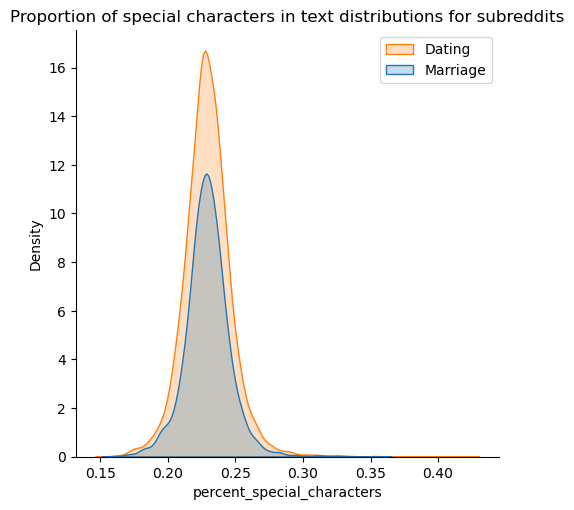

In [49]:
sns.displot(date_marry, x="percent_special_characters", hue="subreddit", kind="kde", fill=True, legend=False)
plt.legend(['Dating', 'Marriage'])
plt.title('Proportion of special characters in text distributions for subreddits');

> <span style="font-size: 16px;">The distribution of percentage of special characters in the posts' texts dont seem to be different between subreddits... The curve for dating is greater because there are more data for it. This can be a sign that this new variable would not make a good predictor after all...

# Upper and lower characters

In [50]:
date_marry['upper'] = date_marry['all_text'].apply(lambda x: sum(1 for char in x if char.isupper()))
date_marry['lower'] = date_marry['all_text'].apply(lambda x: sum(1 for char in x if char.islower()))
date_marry['up_low'] = date_marry['upper']/date_marry['lower']
date_marry['up_low'] = date_marry['up_low'].apply(lambda x: max(x, 0))

In [51]:
date_marry.isna().sum()

title                         0
self_text                     0
subreddit                     0
text_length                   0
all_text                      0
marriage_keywords             0
dating_keywords               0
special_characters            0
percent_special_characters    0
upper                         0
lower                         0
up_low                        0
dtype: int64

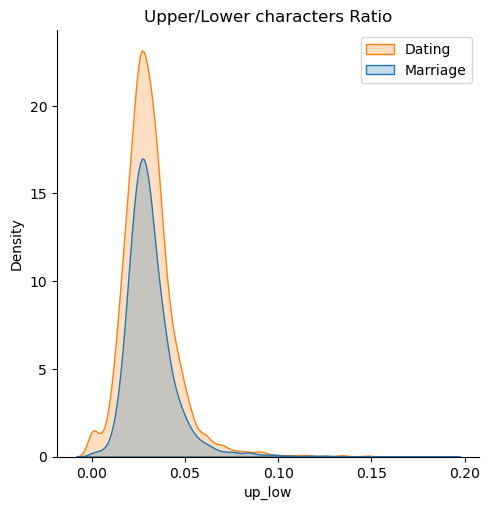

In [52]:
sns.displot(date_marry[date_marry['up_low']<0.2], x="up_low", hue="subreddit", kind="kde", fill=True, legend=False)
plt.legend(['Dating', 'Marriage'])
plt.title('Upper/Lower characters Ratio');

> <span style="font-size: 16px;">These distributions also dont seem to be different between groups...

# Getting the sentiment analysis of the posts' descriptions

In [53]:
# Creating the columns with the negative, positive, neutral and compound scores
sa = SentimentIntensityAnalyzer()
date_marry['compounds'] = date_marry['all_text'].apply(lambda r: sa.polarity_scores(r)['compound'])
date_marry['neg'] = date_marry['all_text'].apply(lambda r: sa.polarity_scores(r)['neg'])
date_marry['neu'] = date_marry['all_text'].apply(lambda r: sa.polarity_scores(r)['neu'])
date_marry['pos'] = date_marry['all_text'].apply(lambda r: sa.polarity_scores(r)['pos'])

In [54]:
# Checking the new columns
date_marry[['compounds', 'neg', 'neu', 'pos']]

,compounds,neg,neu,pos
0,0.9412,0.016,0.843,0.140
1,-0.4004,0.127,0.769,0.104
2,-0.2732,0.076,0.850,0.074
3,0.9606,0.043,0.759,0.198
4,-0.9569,0.186,0.721,0.093
...,...,...,...,...
8331,-0.9275,0.183,0.739,0.078
8332,-0.8789,0.093,0.824,0.083
8333,0.0000,0.000,1.000,0.000
8334,0.4043,0.034,0.940,0.026


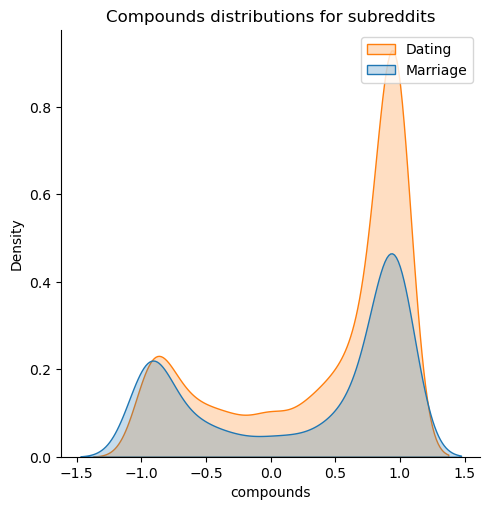

In [55]:
sns.displot(date_marry, x="compounds", hue="subreddit", kind="kde", fill=True, legend=False)
plt.legend(['Dating', 'Marriage'])
plt.title('Compounds distributions for subreddits');

><span style="font-size: 17px;">  Distribution of compounds from dating subreddit texts have a much higher peak at the higher compound value, while the two peaks of marriage do not have this much difference. Marriage subreddit compounds seem more negative, that can almost be divided into two compound groups.

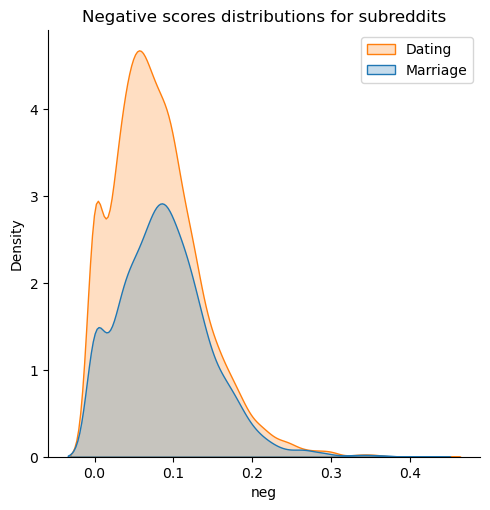

In [56]:
sns.displot(date_marry, x="neg", hue="subreddit", kind="kde", fill=True, legend=False)
plt.legend(['Dating', 'Marriage'])
plt.title('Negative scores distributions for subreddits');

> <span style="font-size: 17px;"> Marriage subreddit texts seem slightly more negative than dating ones.

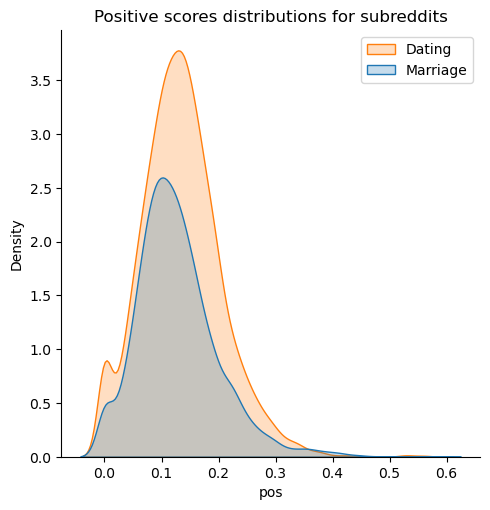

In [57]:
sns.displot(date_marry, x="pos", hue="subreddit", kind="kde", fill=True, legend=False)
plt.legend(['Dating', 'Marriage'])
plt.title('Positive scores distributions for subreddits');

> <span style="font-size: 17px;">Marriage subreddit posts seem to have scores less positives than dating subreddit, since the peak occurs at a slightly lower value.

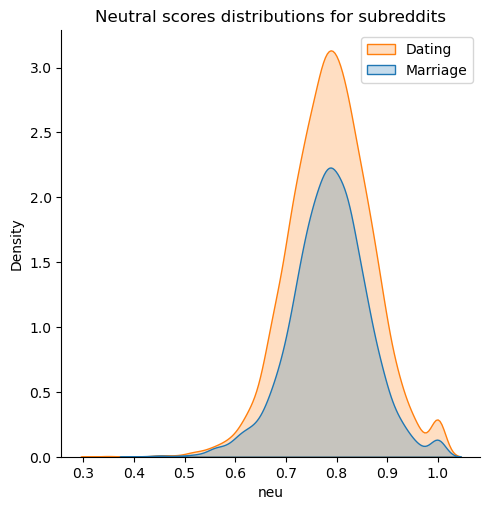

In [58]:
sns.displot(date_marry, x="neu", hue="subreddit", kind="kde", fill=True, legend=False)
plt.legend(['Dating', 'Marriage'])
plt.title('Neutral scores distributions for subreddits');

> <span style="font-size: 17px;">Neutral scores seem a lot similar between both groups. The peaks (one global and one local) seem to be happening at the same two scores.

# Text length

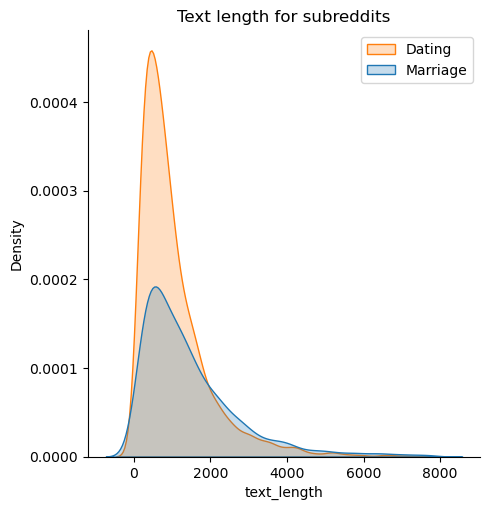

In [59]:
sns.displot(date_marry[date_marry['text_length']<8000], x="text_length", hue="subreddit", kind="kde", fill=True,\
            legend=False)
plt.legend(['Dating', 'Marriage'])
plt.title('Text length for subreddits');

> <span style="font-size: 17px;">Text lengths also seem a lot similar, with texts from marriage subreddit being a bit more spread...

# Numerical columns and Logistic regression

<span style="font-size: 17px;">These new numerical columns don't seem to be different among subreddits, so maybe they arent good predictors of which subreddit the post came from... let's try a logistic regression with these variables to see if it would give a better accuracy than the baseline...

In [60]:
date_marry.dtypes

title                          object
self_text                      object
subreddit                       int64
text_length                     int64
all_text                       object
marriage_keywords               int64
dating_keywords                 int64
special_characters              int64
percent_special_characters    float64
upper                           int64
lower                           int64
up_low                        float64
compounds                     float64
neg                           float64
neu                           float64
pos                           float64
dtype: object

In [61]:
numerical_cols = list(date_marry.select_dtypes(include='number'))
numerical_cols.remove('subreddit')
print(numerical_cols)

['text_length', 'marriage_keywords', 'dating_keywords', 'special_characters', 'percent_special_characters', 'upper', 'lower', 'up_low', 'compounds', 'neg', 'neu', 'pos']


In [66]:
# fitting a logistic regression with all numerical columns
X = date_marry[numerical_cols]
y = date_marry['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1906)

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9001919385796545

In [67]:
# with only the ones that the distributions seemed different
X = date_marry[['special_characters', 'text_length', 'pos', 'neg', 'compounds',
                'dating_keywords','marriage_keywords']]
y = date_marry['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1906)

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9006717850287908

<span style="font-size: 17px;">The score improved when considering only the features that seemed to have different distributions between the groups, excluding the ones that did not seem different.

In [68]:
# with only the ones that the distributions seemed different
X = date_marry[['special_characters', 'text_length', 'pos', 'neg', 'compounds']]
                #'dating_keywords','marriage_keywords']]
y = date_marry['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1906)

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.6482725527831094

In [69]:
# Baseline: assuming all texts are from the most common subreddit
date_marry['subreddit'].value_counts(normalize=True)

1    0.609405
0    0.390595
Name: subreddit, dtype: float64

><span style="font-size: 16px;"> The numericals columns ended up being better predictors than the baseline model (60.9%) in logistic regression!

<span style="font-size: 17px;">Keywords were the most helpful predictors. While modelling, using these as predictors can seem somewhat as data leakage, because they are highly specific to each group. <br>Since the main interest is in seeing the differences of the concerns and being able to predict the group the text comes from, as seen above not every text will have keywords and we want to be able to train the model without these columns. <Br> Besides, I believe those keywords will also find their way into the vectorized columns, so there is no need for creating these extra columns.
    <br> <br>
While modelling, I will check to see if considering these numericals columns will improve from using just the texts vectorized. If not, the model will consider only the texts.

In [70]:
class To_Train():
    def __init__(self):
        pass
        
    def __call__(self, dataset):
        df = dataset.copy()
        df['subreddit'] = (df['subreddit']=='dating')*1
        df['all_text'] = df['title'] + ' ' + df['self_text']
        df.drop(['self_text', 'title'], axis=1, inplace=True)
        df['text_length'] = df['all_text'].apply(lambda x: len(x))
        df['special_characters'] = df['all_text'].apply(lambda x: sum(not c.isalpha() for c in x ))
        df['compounds'] = df['all_text'].apply(lambda r: sa.polarity_scores(r)['compound'])
        df['neg'] = df['all_text'].apply(lambda r: sa.polarity_scores(r)['neg'])
        df['pos'] = df['all_text'].apply(lambda r: sa.polarity_scores(r)['pos'])
        return df

<span style="font-size: 16px;"> In the next notebook I will explore different models with different preprocessing and parameters, and in the end I hope to be able to see the difference of the main concerns for each group, based on the features with the highest coefficients.